In [52]:
import numpy as np
import figure_options
from figure_options import plt, sns, rc_parameters
from tqdm import tqdm
from baifg.utils.characteristic_time import compute_characteristic_time_gaussian
from baifg.utils.graphs import make_loopystar_graph



In [53]:
K = 5
eps = 0
N = 100
pvalues = np.linspace(0, 1, N)
Tvalues1 = []
Tvalues2 = []

for p in tqdm(pvalues):
    fg = make_loopystar_graph(p, q=1, r=0.25, K=K)
    sol = compute_characteristic_time_gaussian(fg)
    Tvalues1.append(sol.value)

    fg = make_loopystar_graph(p, q=0.25, r=0.25, K=K)
    sol = compute_characteristic_time_gaussian(fg)
    Tvalues2.append(sol.value)
Tvalues1 = np.array(Tvalues1)
Tvalues2 = np.array(Tvalues2)



100%|██████████| 100/100 [00:07<00:00, 13.65it/s]


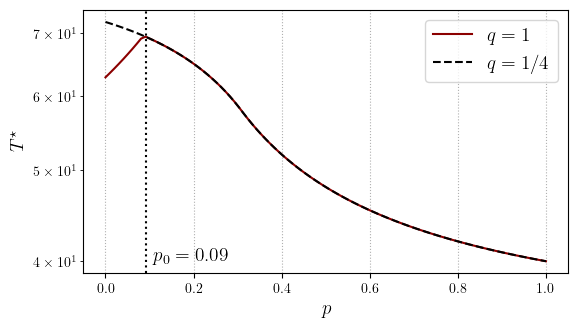

In [54]:
fig = plt.figure(figsize=(6,3.5))
plt.plot(pvalues, Tvalues1, label=r'$q=1$', color='darkred')
plt.plot(pvalues, Tvalues2, '--k', label=r'$q=1/4$')
p0 =pvalues[np.argwhere(np.abs(Tvalues1- Tvalues2) < 1e-3)[0]]
plt.axvline(x=p0.item(), color='black', linestyle=':')

plt.text(p0.item()*1.15, 40, f'$p_0 = {p0.item():.2f}$')

plt.yscale('log')
plt.xlabel(r'$p$')
plt.ylabel(r'$T^\star$')
plt.legend()
plt.grid(linestyle = ":")
#plt.title("Characteristic time for loopy star graph")
plt.tight_layout()
plt.savefig('figures/examples/characteristic_time_loopystar.pdf', bbox_inches='tight')

In [55]:
def plot_w(solutions0, solutions1, xticks, par):
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots(1,2, figsize=(10,3))
    x = np.arange(solutions0.shape[0])
    for idx, solutions in enumerate([solutions0, solutions1]):
        for i in range(solutions.shape[1]):
            ax[idx].bar(x + i*width, solutions[:, i], width, label=f'$w_{i+1}^\star$')

        # Add labels, title, and custom x-axis tick labels
        ax[idx].set_xlabel(r'$p$')
        
        ax[idx].set_title(f'Loopy star with {par[idx]}' )
        ax[idx].set_xticks(x + width*2)
        ax[idx].set_xticklabels(xticks)
    ax[0].set_ylabel(r'$w^\star$')
    ax[-1].legend(handlelength=1, bbox_to_anchor=(1.25, 1.05))


    plt.tight_layout()
    plt.savefig('figures/examples/allocations_loopystar.pdf', bbox_inches='tight')

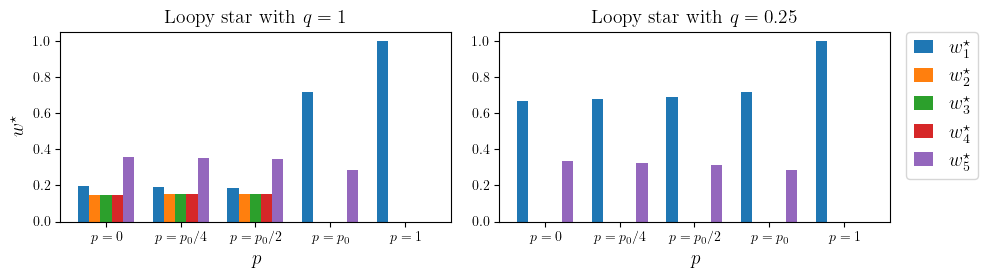

In [56]:

sol0 = compute_characteristic_time_gaussian(make_loopystar_graph(p=0, q=1, r=0.25,  K=K))
sol1 = compute_characteristic_time_gaussian(make_loopystar_graph(p=p0.item()/4, q=1, r=0.25,  K=K))
sol2 = compute_characteristic_time_gaussian(make_loopystar_graph(p=p0.item()/2, q=1, r=0.25,  K=K))
sol3 = compute_characteristic_time_gaussian(make_loopystar_graph(p=p0.item(), q=1, r=0.25,  K=K))
sol4 = compute_characteristic_time_gaussian(make_loopystar_graph(p=1, q=1, r=0.25,  K=K))
solutions_0 = np.vstack([sol0.wstar, sol1.wstar, sol2.wstar, sol3.wstar, sol4.wstar])


sol0 = compute_characteristic_time_gaussian(make_loopystar_graph(p=0, q=0.25, r=0.25,  K=K))
sol1 = compute_characteristic_time_gaussian(make_loopystar_graph(p=p0.item()/4, q=0.25, r=0.25,  K=K))
sol2 = compute_characteristic_time_gaussian(make_loopystar_graph(p=p0.item()/2, q=0.25, r=0.25,  K=K))
sol3 = compute_characteristic_time_gaussian(make_loopystar_graph(p=p0.item(), q=0.25, r=0.25,  K=K))
sol4 = compute_characteristic_time_gaussian(make_loopystar_graph(p=1, q=0.25, r=0.25,  K=K))
solutions_1 = np.vstack([sol0.wstar, sol1.wstar, sol2.wstar, sol3.wstar, sol4.wstar])

plot_w(solutions_0, solutions_1,['$p=0$','$p=p_0/4$', '$p=p_0/2$', '$p=p_0$', '$p=1$'], ["$q=1$", "$q=0.25$"])

